# ASTR 499 - Notebook 1

In [2]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pandas as pd
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import tarfile
import sqlite3
import lsst.daf.persistence as dafPersist

## Listing Quasars

##### HiTS DR1 Full Dataset

In [3]:
hitsDataDir='/epyc/users/mrawls/premap2019/hits-dr1/classification'
hitsFilename='HiTS_RF_predictions.fits'
hitsFilepath=os.path.join(hitsDataDir,hitsFilename)
hitsTable=fits.open(hitsFilepath) # load data as an astropy fits thing
hitsDf=pd.DataFrame(hitsTable[1].data) # turn data into a pandas dataframe
hitsDf.head() # shows us what the dataframe looks like

,ID,internalID,raMedian,decMedian,Variable_prob,Periodic_prob,DSCT_Prob,EB_Prob,ROTVAR_Prob,RRLYR_Prob,CV_Prob,QSO_Prob,SNe_Prob,Predicted_class
0,HiTS090434-041626,Blind15A_02_S1_1856_0087,136.145756,-4.273908,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
1,HiTS090434-042338,Blind15A_02_N1_1253_0089,136.145561,-4.394096,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
2,HiTS090434-042506,Blind15A_02_N1_1587_0054,136.142838,-4.418445,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
3,HiTS090434-042629,Blind15A_02_N1_1903_0088,136.145272,-4.441517,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
4,HiTS090435-000829,Blind15A_04_S1_0030_0051,136.146090,-0.141399,0.033194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV


##### HiTS DR1 Subset

In [4]:
hitsDataDir_sub='/epyc/users/mrawls/premap2019/hits-dr1'
hitsFilename_sub='HiTS_DR1_variables_DM-dataset-subset.fits'
hitsFilepath_sub=os.path.join(hitsDataDir_sub,hitsFilename_sub)
hitsTable_sub=fits.open(hitsFilepath_sub) # load data as an astropy fits thing
hitsDf_sub=pd.DataFrame(hitsTable_sub[1].data) # turn data into a pandas dataframe
hitsDf_sub.head() # shows us what the dataframe looks like

,ID,internalID,raMedian,decMedian,Variable_prob,Periodic_prob,DSCT_Prob,EB_Prob,ROTVAR_Prob,RRLYR_Prob,...,Rcs,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,g-i,g-r,r-i
0,HiTS095611+020452,Blind15A_26_N1_1715_0146,149.048038,2.081381,0.523601,0.202651,NaN,NaN,NaN,NaN,...,0.246009,-0.584446,0.134705,2.100608,0.032812,0.773151,0.738233,2.859381,1.439736,1.419645
1,HiTS095645+021135,Blind15A_26_N1_0181_2093,149.190225,2.193068,0.564932,0.635018,0.400,0.100,0.375,0.125,...,0.119267,-0.133774,0.067353,-0.444997,0.123052,0.841553,0.815632,0.996040,0.769289,0.226751
2,HiTS095652+023537,Blind15A_26_S14_1446_0379,149.220445,2.593841,0.962477,0.635836,0.025,0.125,0.750,0.100,...,0.227995,-0.317121,0.269410,-0.008631,0.067782,0.849505,0.846981,1.911452,1.484048,0.427403
3,HiTS095702+023628,Blind15A_26_S14_1253_0945,149.261780,2.607883,0.532390,0.933333,0.550,0.225,0.050,0.175,...,0.179956,-0.288333,0.067353,-1.067079,0.181790,0.853063,0.754798,NaN,NaN,NaN
4,HiTS095726+015556,Blind15A_26_N8_1496_2317,149.361376,1.932343,0.972280,0.889344,0.050,0.175,0.625,0.150,...,0.269737,-0.035972,0.740878,-1.731678,0.089139,0.957841,0.948092,1.185192,0.894064,0.291128


##### Number of QSO's for Various Probabilities for HiTS DR1 Full Dataset

In [5]:
hitsDf.query('QSO_Prob > 0.0')['ID'].count()

2169

In [6]:
hitsDf.query('QSO_Prob > .70')['ID'].count()

1186

In [7]:
hitsDf.query('QSO_Prob > .80')['ID'].count()

630

In [8]:
hitsDf.query('QSO_Prob > .90')['ID'].count()

160

In [9]:
hitsDf.query('QSO_Prob > .95')['ID'].count()

57

In [10]:
hitsDf.query('QSO_Prob > .99')['ID'].count()

14

##### Numbers of QSO's for Various Probabilities for HiTS DR1 Subset

In [11]:
hitsDf_sub.query('QSO_Prob > .50')['ID'].count()

86

In [12]:
hitsDf_sub.query('QSO_Prob > .70')['ID'].count()

46

In [13]:
hitsDf_sub.query('QSO_Prob > .80')['ID'].count()

20

In [14]:
hitsDf_sub.query('QSO_Prob > .90')['ID'].count()

5

In [15]:
hitsDf_sub.query('QSO_Prob > .95')['ID'].count()

3

In [16]:
hitsDf_sub.query('QSO_Prob > .99')['ID'].count()

0

### Makaing New QSO Data Frames

##### HiTS DR1 Full Dataset

In [17]:
hitsDf.columns

Index(['ID', 'internalID', 'raMedian', 'decMedian', 'Variable_prob',
       'Periodic_prob', 'DSCT_Prob', 'EB_Prob', 'ROTVAR_Prob', 'RRLYR_Prob',
       'CV_Prob', 'QSO_Prob', 'SNe_Prob', 'Predicted_class'],
      dtype='object')

In [18]:
hitsDfQSO_filter = hitsDf[hitsDf['QSO_Prob'] > 0.80]

In [19]:
hitsDfQSO = hitsDfQSO_filter.drop(['Variable_prob', 'Periodic_prob', 'DSCT_Prob', 'EB_Prob', 'Predicted_class',
                                   'ROTVAR_Prob', 'RRLYR_Prob', 'CV_Prob', 'SNe_Prob'], axis = 1)

In [20]:
hitsDfQSO.head()

,ID,internalID,raMedian,decMedian,QSO_Prob
2668,HiTS090524-041110,Blind15A_02_S1_0648_2891,136.350909,-4.186367,0.975
4891,HiTS090543-041323,Blind15A_02_S1_1148_3999,136.431651,-4.223211,0.825
7190,HiTS090602-040245,Blind15A_02_S8_0977_2949,136.510771,-4.045886,0.950
7548,HiTS090604-044418,Blind15A_02_N14_1454_3046,136.516803,-4.738595,0.900
8304,HiTS090610-000337,Blind15A_04_S8_1177_3373,136.543299,-0.060552,0.850


##### HiTS DR1 Subset

In [21]:
hitsDf_sub.columns

Index(['ID', 'internalID', 'raMedian', 'decMedian', 'Variable_prob',
       'Periodic_prob', 'DSCT_Prob', 'EB_Prob', 'ROTVAR_Prob', 'RRLYR_Prob',
       'CV_Prob', 'QSO_Prob', 'SNe_Prob', 'Predicted_class', 'ID_feat',
       'raMedian_feat', 'decMedian_feat', 'Amplitude', 'AndersonDarling',
       'Autocor_length', 'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau',
       'Con', 'Eta_e', 'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0',
       'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2',
       'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0',
       'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2',
       'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0',
       'Fre

In [22]:
hitsDfQSO_sub = hitsDf_sub[hitsDf_sub['QSO_Prob'] > 0.80]

In [23]:
hitsDfQSO_sub

,ID,internalID,raMedian,decMedian,Variable_prob,Periodic_prob,DSCT_Prob,EB_Prob,ROTVAR_Prob,RRLYR_Prob,...,Rcs,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,g-i,g-r,r-i
12,HiTS095824+013052,Blind15A_26_N25_0466_1383,149.604007,1.514554,0.722405,0.085199,NaN,NaN,NaN,NaN,...,0.289742,-0.061101,0.134705,-0.479007,0.052205,0.877099,0.724469,NaN,NaN,NaN
19,HiTS095906+023411,Blind15A_26_S15_1778_3732,149.775547,2.569846,0.700000,0.390697,NaN,NaN,NaN,NaN,...,0.420546,-0.594354,0.875583,-0.062144,0.024636,0.822118,0.880237,-1.334129,-1.042169,-0.291960
35,HiTS100126+012007,Blind15A_26_N31_0662_1083,150.358619,1.335401,0.520305,0.436615,NaN,NaN,NaN,NaN,...,0.285576,0.140620,0.202452,-1.167321,0.085182,0.859821,0.807446,1.105655,0.707078,0.398576
40,HiTS100158+015816,Blind15A_26_N12_0952_0771,150.492562,1.971313,0.700000,0.277657,NaN,NaN,NaN,NaN,...,0.362111,-0.584109,0.134705,-0.046382,0.035685,0.870675,0.803572,0.573734,0.385713,0.188021
42,HiTS100203+014206,Blind15A_26_N23_0131_3196,150.513886,1.701888,0.733057,0.104174,NaN,NaN,NaN,NaN,...,0.358926,-0.041477,0.269410,-0.949479,0.046000,0.853704,0.800476,0.438501,0.299798,0.138704
50,HiTS100312+023624,Blind15A_26_S19_1258_0720,150.800129,2.606857,0.732505,0.454927,NaN,NaN,NaN,NaN,...,0.327785,-0.021087,0.269410,-0.433423,0.020285,0.855364,0.816365,1.115453,0.727710,0.387744
58,HiTS101701-062013,Blind15A_40_S8_1964_0931,154.254351,-6.337102,0.800000,0.498545,NaN,NaN,NaN,NaN,...,0.329587,0.344962,0.874909,-0.687273,0.035174,0.892263,0.834892,0.826516,0.595061,0.231455
67,HiTS101816-065629,Blind15A_40_N15_1221_1004,154.570066,-6.941392,0.731082,0.134966,NaN,NaN,NaN,NaN,...,0.143827,0.372744,0.067301,-0.705263,0.051167,0.830279,0.779927,1.846743,1.286600,0.560143
78,HiTS101852-071519,Blind15A_40_N25_1016_3006,154.717640,-7.255553,0.566667,0.037777,NaN,NaN,NaN,NaN,...,0.360651,0.342250,0.134601,-0.201076,0.071784,0.783642,0.799310,0.238844,0.112538,0.126307
80,HiTS101903-042524,Blind15A_42_S20_1748_0924,154.763277,-4.423415,0.766527,0.369877,NaN,NaN,NaN,NaN,...,0.314573,-0.339547,0.134623,-0.279066,0.071465,0.840849,0.815278,NaN,1.175168,NaN


### Makin' Some Plots

##### Full Dataset

In [51]:
hitsDf.head()
#Variable = hitsDf.query('Variable_prob > .50')['ID'].count()
Periodic = hitsDf.query('Periodic_prob > .50')['ID'].count()
DSCT = hitsDf.query('DSCT_Prob > .50')['ID'].count()
EB = hitsDf.query('EB_Prob > .50')['ID'].count()
ROTVAR = hitsDf.query('ROTVAR_Prob > .50')['ID'].count()
RRLYR = hitsDf.query('RRLYR_Prob > .50')['ID'].count()
CV = hitsDf.query('CV_Prob > .50')['ID'].count()
QSO = hitsDf.query('QSO_Prob > .50')['ID'].count()
SNe = hitsDf.query('SNe_Prob > .50')['ID'].count()
bar_array = (Periodic,DSCT,EB,ROTVAR,RRLYR,CV,QSO,SNe)
objects = ('Periodic','DSCT','EB','ROTVAR','RRLYR','CV','QSO','SNe')
y_pos = np.arange(len(objects))

([<matplotlib.axis.XTick at 0x7f9a9e16b908>,
 <a list of 8 Text xticklabel objects>)

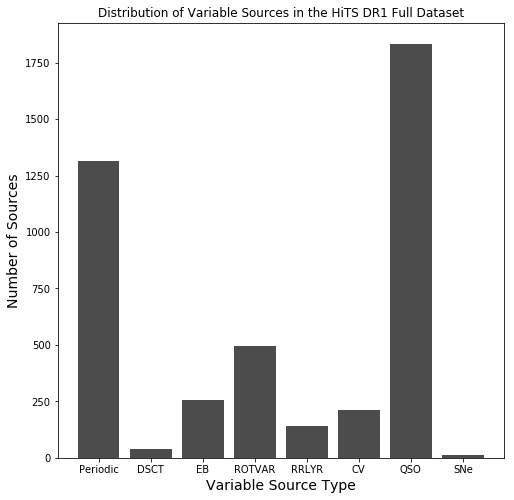

In [52]:
plt.figure(figsize = (8,8))
plt.bar(y_pos,bar_array, align = 'center', alpha = 0.7, color = 'k')
plt.title("Distribution of Variable Sources in the HiTS DR1 Full Dataset")
plt.ylabel("Number of Sources", fontsize = 14)
plt.xlabel('Variable Source Type', fontsize = 14)
plt.xticks(y_pos,objects)

In [24]:
total_QSO = hitsDf['QSO_Prob'].count() # Can't use total sources here since there are 2.5 million so you cant see the QSO's.
total_QSO50 = hitsDf.query('QSO_Prob > .50')['ID'].count()
total_QSO60 = hitsDf.query('QSO_Prob > .60')['ID'].count()
total_QSO70 = hitsDf.query('QSO_Prob > .70')['ID'].count()
total_QSO80 = hitsDf.query('QSO_Prob > .80')['ID'].count()
total_QSO90 = hitsDf.query('QSO_Prob > .90')['ID'].count()
total_QSO95 = hitsDf.query('QSO_Prob > .95')['ID'].count()
total_QSO99 = hitsDf.query('QSO_Prob > .99')['ID'].count()
bar_array = (total_QSO,total_QSO50,total_QSO60,total_QSO70,total_QSO80,total_QSO90,total_QSO95,total_QSO99)
objects = ('>0%','>50%','>60%','>70%','>80%','>90%','>95%','>99%')
y_pos = np.arange(len(objects))

([<matplotlib.axis.XTick at 0x7f9ac4561f60>,
 <a list of 8 Text xticklabel objects>)

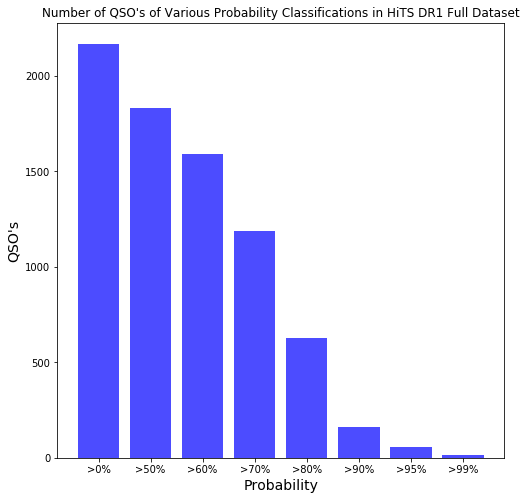

In [25]:
plt.figure(figsize = (8,8))
plt.bar(y_pos,bar_array, align = 'center', alpha = 0.7, color = 'b')
plt.title("Number of QSO's of Various Probability Classifications in HiTS DR1 Full Dataset")
plt.ylabel("QSO's", fontsize = 14)
plt.xlabel('Probability', fontsize = 14)
plt.xticks(y_pos,objects)

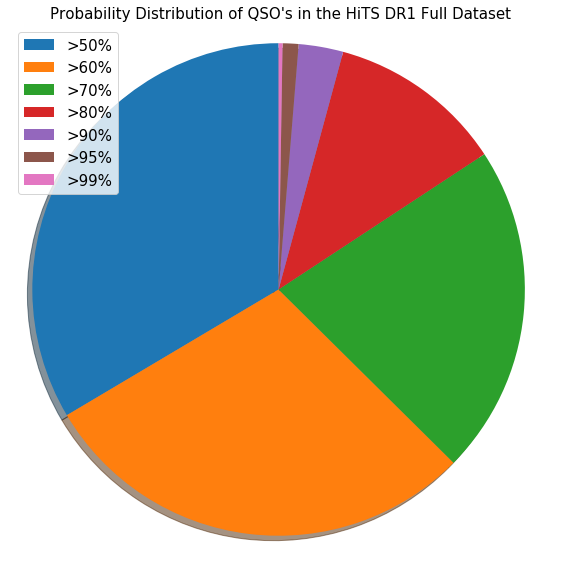

In [26]:
plt.figure(figsize = (8,8))
labels = '>50%', '>60%', '>70%', '>80%', '>90%', '>95%', '>99%'
sizes = [84.55509451,73.25956662,54.67957584,29.045643153526,7.376671277,2.627939124,0.6454587367]
#colors = 
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.title("Probability Distribution of QSO's in the HiTS DR1 Full Dataset", fontsize = 15)
plt.legend(patches, labels, loc="best",prop={'size': 15})
plt.axis('equal')
plt.tight_layout()

##### Subset

In [53]:
hitsDf_sub.head()
#Variable = hitsDf_sub.query('Variable_prob > .50')['ID'].count()  Is this the total number?
Periodic = hitsDf_sub.query('Periodic_prob > .50')['ID'].count()
DSCT = hitsDf_sub.query('DSCT_Prob > .50')['ID'].count()
EB = hitsDf_sub.query('EB_Prob > .50')['ID'].count()
ROTVAR = hitsDf_sub.query('ROTVAR_Prob > .50')['ID'].count()
RRLYR = hitsDf_sub.query('RRLYR_Prob > .50')['ID'].count()
CV = hitsDf_sub.query('CV_Prob > .50')['ID'].count()
QSO = hitsDf_sub.query('QSO_Prob > .50')['ID'].count()
SNe = hitsDf_sub.query('SNe_Prob > .50')['ID'].count()
bar_array = (Periodic,DSCT,EB,ROTVAR,RRLYR,CV,QSO,SNe)
objects = ('Periodic','DSCT','EB','ROTVAR','RRLYR','CV','QSO','SNe')
y_pos = np.arange(len(objects))

([<matplotlib.axis.XTick at 0x7f9a9e0e0470>,
 <a list of 8 Text xticklabel objects>)

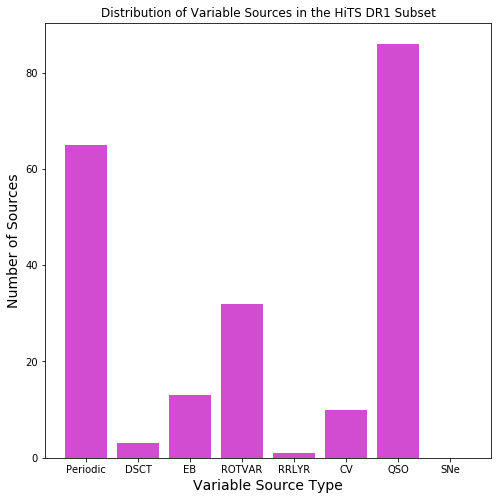

In [54]:
plt.figure(figsize = (8,8))
plt.bar(y_pos,bar_array, align = 'center', alpha = 0.7, color = 'm')
plt.title("Distribution of Variable Sources in the HiTS DR1 Subset")
plt.ylabel("Number of Sources", fontsize = 14)
plt.xlabel('Variable Source Type', fontsize = 14)
plt.xticks(y_pos,objects)

In [27]:
total_QSO_sub = hitsDf_sub['QSO_Prob'].count() # I can plot the total sources for this one but it looks weird. 
total_QSO50_sub = hitsDf_sub.query('QSO_Prob > .50')['ID'].count()
total_QSO60_sub = hitsDf_sub.query('QSO_Prob > .60')['ID'].count()
total_QSO70_sub = hitsDf_sub.query('QSO_Prob > .70')['ID'].count()
total_QSO80_sub = hitsDf_sub.query('QSO_Prob > .80')['ID'].count()
total_QSO90_sub = hitsDf_sub.query('QSO_Prob > .90')['ID'].count()
total_QSO95_sub = hitsDf_sub.query('QSO_Prob > .95')['ID'].count()
total_QSO99_sub = hitsDf_sub.query('QSO_Prob > .99')['ID'].count()
bar_array_sub = (total_QSO_sub,total_QSO50_sub,total_QSO60_sub,total_QSO70_sub,
             total_QSO80_sub,total_QSO90_sub,total_QSO95_sub,total_QSO99_sub)
objects_sub = ('>0%','>50%','>60%','>70%','>80%','>90%','>95%','>99%')
y_pos_sub = np.arange(len(objects_sub))

([<matplotlib.axis.XTick at 0x7f9abf1d9940>,
 <a list of 8 Text xticklabel objects>)

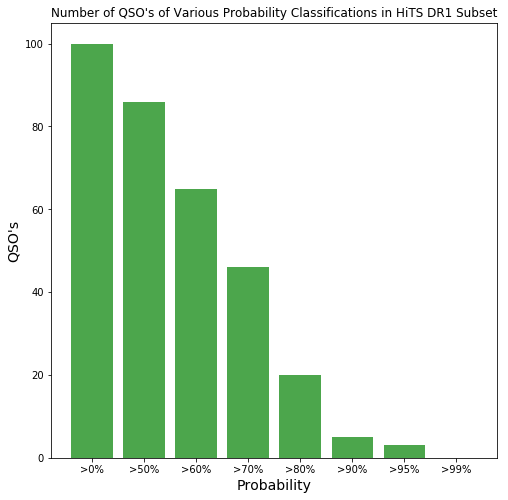

In [28]:
plt.figure(figsize = (8,8))
plt.bar(y_pos_sub, bar_array_sub, align = 'center', alpha = 0.7, color = 'g')
plt.title("Number of QSO's of Various Probability Classifications in HiTS DR1 Subset")
plt.ylabel("QSO's", fontsize = 14)
plt.xlabel('Probability', fontsize = 14)
plt.xticks(y_pos_sub,objects_sub)

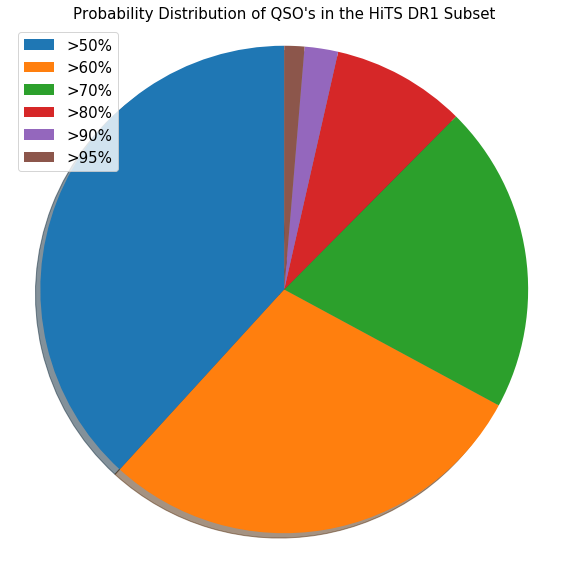

In [29]:
plt.figure(figsize = (8,8))
labels = '>50%', '>60%', '>70%', '>80%', '>90%', '>95%'
sizes = [52.12,39.39,27.877778,12.12,3.03,1.81]
#colors = 
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.title("Probability Distribution of QSO's in the HiTS DR1 Subset", fontsize = 15)
plt.legend(patches, labels, loc="best",prop={'size': 15})
plt.axis('equal')
plt.tight_layout()

It is sort of interesting to see the similarities in these plots. It seems as if the survey shows an relatively even distribution of objects, so it wont matter where you look, you should see approximately the same source distribution.